Using TensorFlow backend.
/Users/hwookim/docs/Univ/2021-1/AI/keras-practice/venv/lib/python3.7/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.119122). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/Users/hwookim/docs/Univ/2021-1/AI/keras-practice/venv/lib/python3.7/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.115094). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


Train on 1500 samples, validate on 300 samples
Epoch 1/1000
1500/1500 [==============================] - 1s 369us/step - loss: 12132.7755 - val_loss: 1580.8220
Epoch 2/1000
1500/1500 [==============================] - 0s 173us/step - loss: 1330.5083 - val_loss: 1193.5096
Epoch 3/1000
1500/1500 [==============================] - 0s 173us/step - los

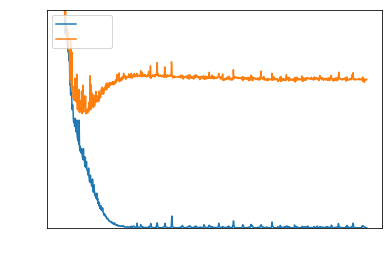

In [1]:
import Predictor
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

width = 16
height = 16

# 데이터셋 생성
x_train, y_train = Predictor.generate_dataset(1500)
x_val, y_val = Predictor.generate_dataset(300)
x_test, y_test = Predictor.generate_dataset(100)

# 모델 구성
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1))

# 모델 학습
model.compile(loss='mse', optimizer='adam')

hist = model.fit(x_train, y_train, batch_size=32, epochs=1000, validation_data=(x_val, y_val))

# 학습 과정 출력
Predictor.show_model_learning_process(hist)

# 모델 평가
score = model.evaluate(x_test, y_test, batch_size=32)

print(score)

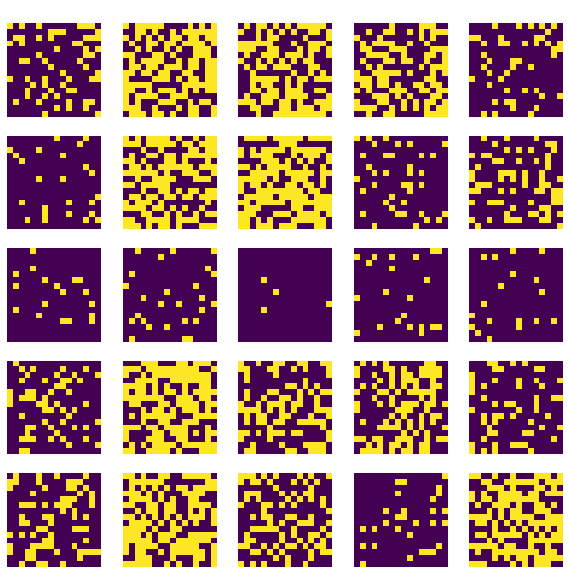

In [2]:
yhat_test = model.predict(x_test, batch_size=32)

%matplotlib inline
import matplotlib.pyplot as plt
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.set_title('R %d P %.1f' % (y_test[i][0], yhat_test[i][0]))

plt.show()
